In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()
import mutual_information
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 603037.98it/s]


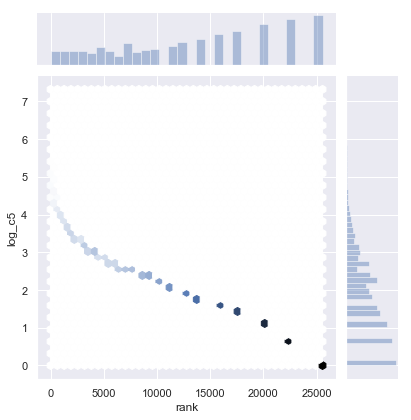

In [6]:
# consider just one year - 2009 for analysis
# Joint distribution between the title and rank

tmp = data[data.PubYear_x == 2005]
tmp = tmp.sort_values(by=['c5'],ascending=False)
tmp['rank'] = tmp.c5.rank(ascending=0,method='average')
g = sns.jointplot("rank", "log_c5", data=tmp, kind="hex", color="b")


# Some kind of a line - as expected!

In [7]:
def mutual_information_for_year(year, col1="character_count", col2="rank"):
    tmp = data[data.PubYear_x == year]
    tmp = tmp.sort_values(by=['c5'],ascending=False)
    tmp['rank'] = tmp.c5.rank(ascending=0,method='average')
    mi_05 = mutual_information.calculate(list(tmp[col1]), list(tmp[col2]))
    return mi_05

In [8]:
mi_char_rank = [mutual_information_for_year(year) for year in range(1950,2010)]
mi_word_rank = [mutual_information_for_year(year, col1="word_count") for year in range(1950,2010)]
mi_char_logc5 = [mutual_information_for_year(year, col2="log_c5") for year in range(1950,2010)]
mi_word_logc5 = [mutual_information_for_year(year, col1="word_count", col2="log_c5") for year in range(1950,2010)]




Text(0,0.5,'Mutual Information Variation of Word Count and log c5')

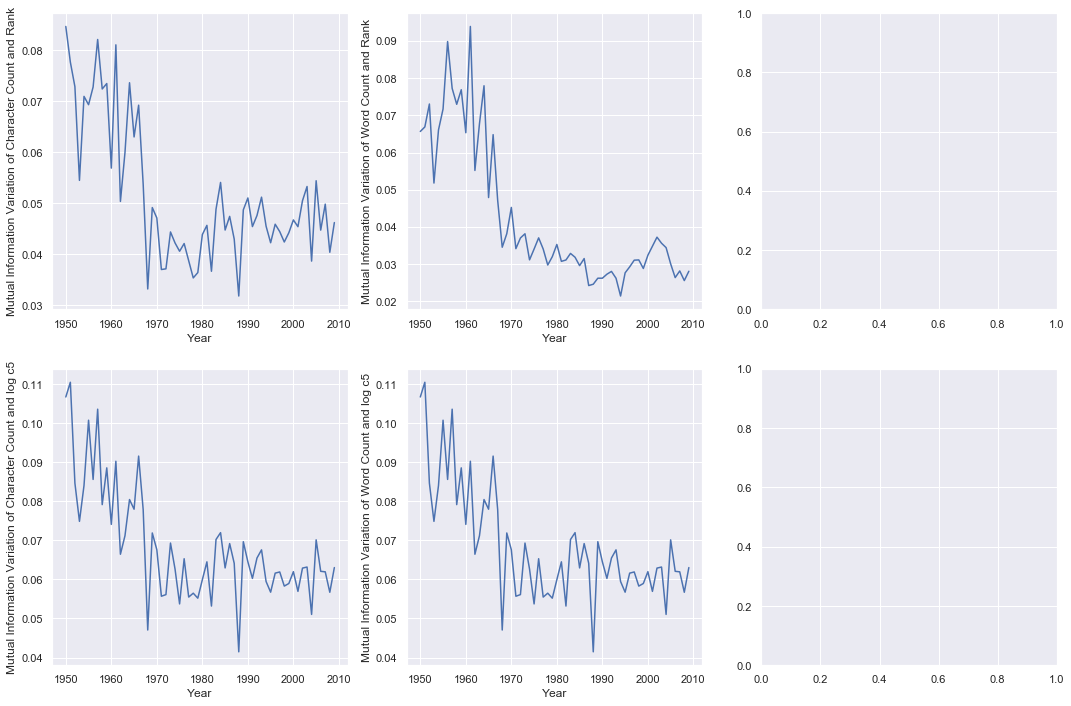

In [10]:
f1 = plt.figure(figsize=(18,12))
ax11 = f1.add_subplot(231)
ax12 = f1.add_subplot(232)
ax13 = f1.add_subplot(233)
ax14 = f1.add_subplot(234)
ax15 = f1.add_subplot(235)
ax16 = f1.add_subplot(236)

years = list(range(1950, 2010))

ax11.plot(years, mi_char_rank, 'b')
ax11.set_xlabel("Year")
ax11.set_ylabel("Mutual Information Variation of Character Count and Rank")

ax12.plot(years, mi_word_rank, 'b')
ax12.set_xlabel("Year")
ax12.set_ylabel("Mutual Information Variation of Word Count and Rank")

ax14.plot(years, mi_char_logc5, 'b')
ax14.set_xlabel("Year")
ax14.set_ylabel("Mutual Information Variation of Character Count and log c5")

ax15.plot(years, mi_char_logc5, 'b')
ax15.set_xlabel("Year")
ax15.set_ylabel("Mutual Information Variation of Word Count and log c5")